# Parkinson's Disease Detection Project
# Objective: Predict Parkinson's disease using patient health measurements

# 1. Libraries Import

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid") 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle


# 2. Load Dataset

In [31]:
df = pd.read_csv("Parkinson's_Data.csv")

In [32]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
5,3063,68,1,2,1,39.423311,1,13.596889,7.796704,7.070239,...,6.824779,0,0,0,0,0,0,0,0,DrXXXConfid
6,3064,78,1,0,0,30.542003,1,2.011281,9.028536,9.838446,...,0.502747,1,0,0,0,1,0,0,0,DrXXXConfid
7,3065,70,1,0,0,36.758282,1,19.988866,3.891749,3.421960,...,1.190611,1,0,0,1,0,0,1,1,DrXXXConfid
8,3066,80,0,2,1,22.380587,1,7.293288,2.595670,4.784827,...,3.438111,0,0,0,0,0,0,0,1,DrXXXConfid
9,3067,71,0,3,2,23.727086,1,17.782910,7.344890,3.393018,...,5.346982,0,0,0,0,0,1,0,0,DrXXXConfid


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [34]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check for missing and Duplicate values

In [35]:
print("Missing Values per columns:\n")
display(df.isnull().sum().sort_values(ascending= False))

dups = df.duplicated().sum()
print(f"Number of Duplicate values: {dups}")

Missing Values per columns:



PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

Number of Duplicate values: 0


# 3. Exploratory Data Analysis (EDA)

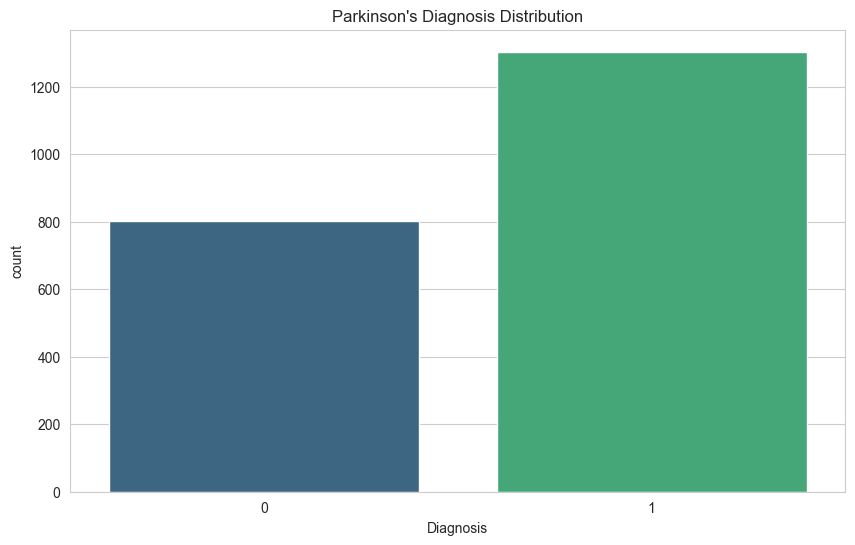

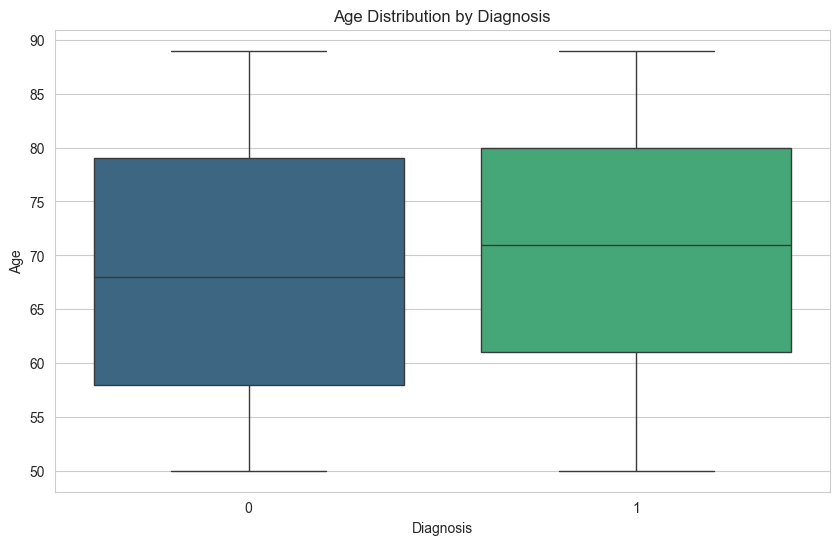

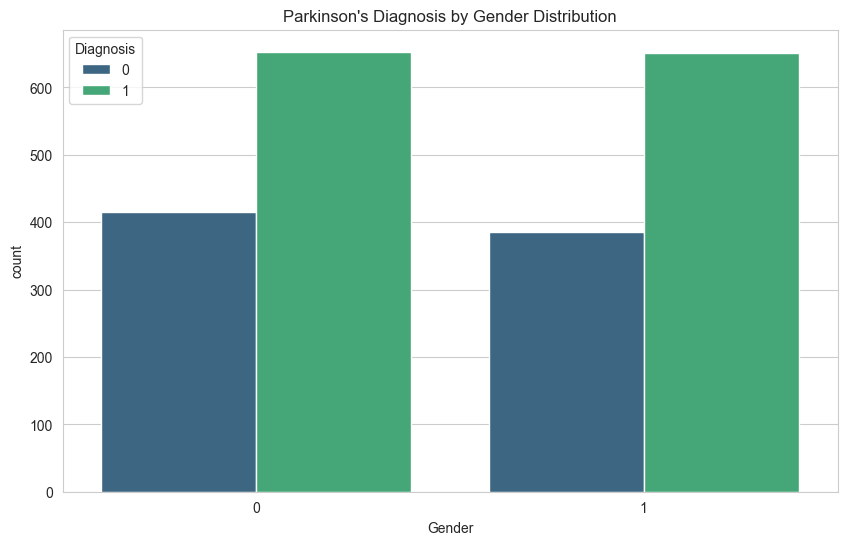

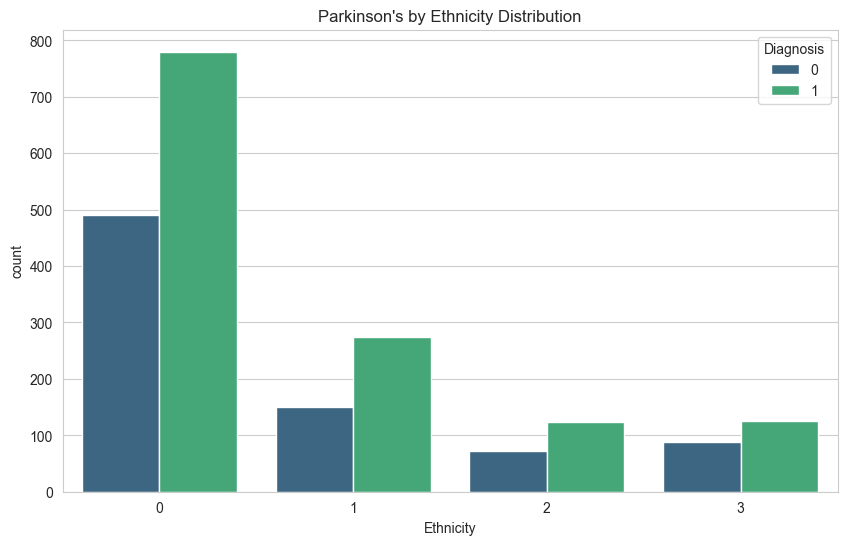

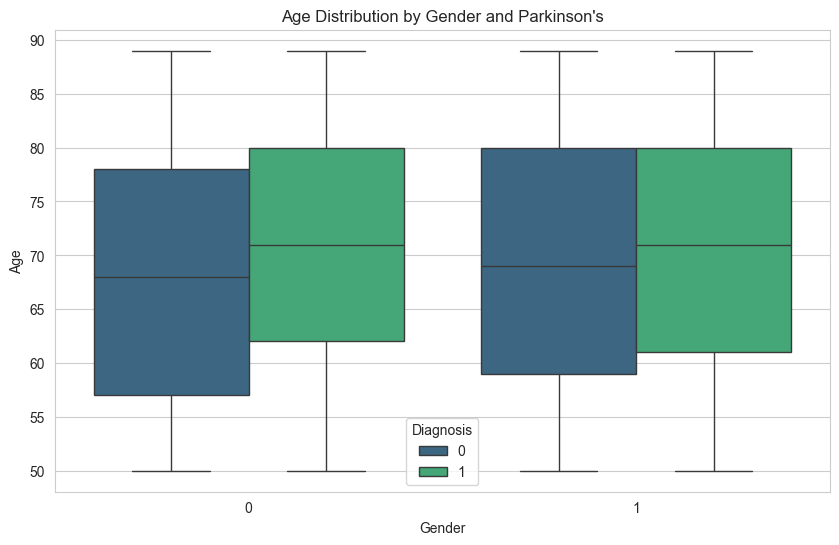

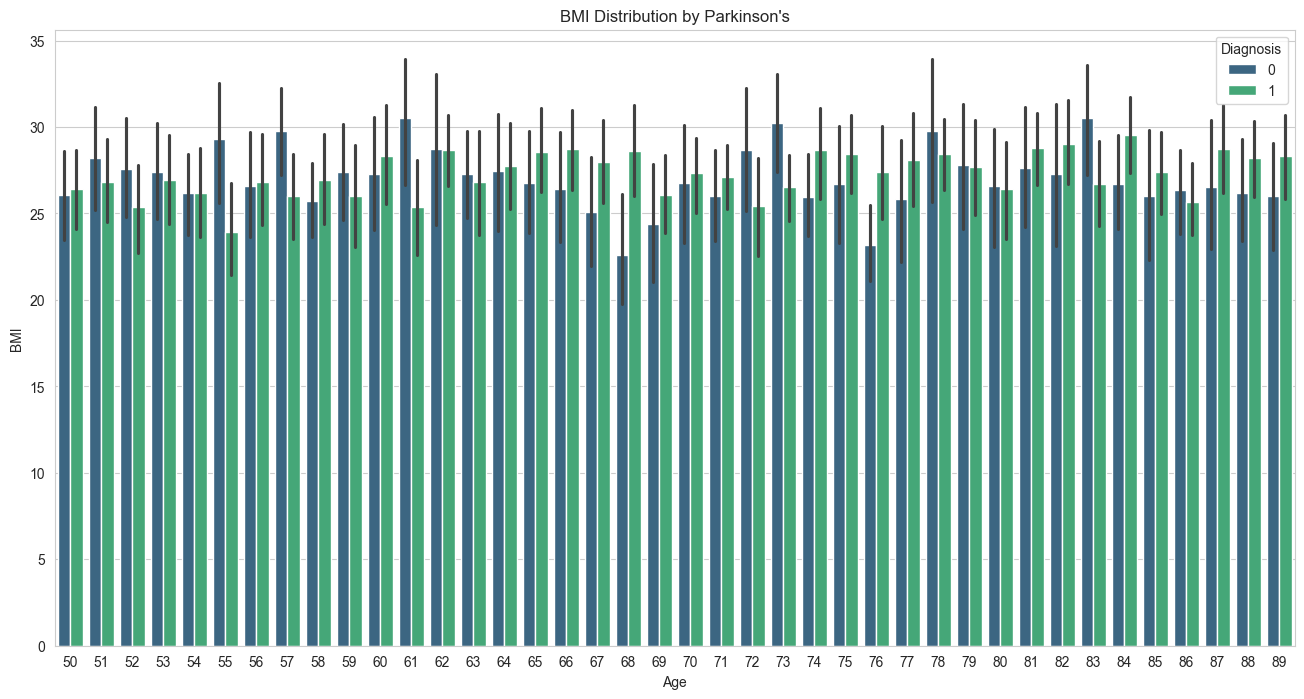

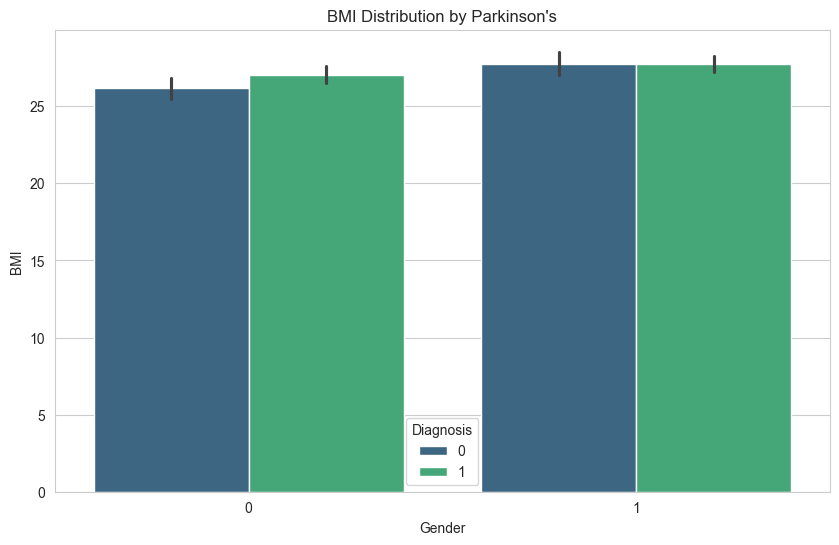

In [36]:
# Diagnosis distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'Diagnosis', data = df, palette = 'viridis')
plt.title("Parkinson's Diagnosis Distribution")
plt.xlabel('Diagnosis')
plt.show()

# Age distribution by diagnosis
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Diagnosis', y = 'Age', data = df, palette = 'viridis')
plt.title('Age Distribution by Diagnosis')
plt.show()

# Gender vs Diagnosis
plt.figure(figsize = (10,6))
sns.countplot(x = 'Gender', hue = "Diagnosis", data = df, palette = 'viridis')
plt.title("Parkinson's Diagnosis by Gender Distribution")
plt.show()

# Ethnicity vs Diagnosis
plt.figure(figsize = (10,6))
sns.countplot(x = 'Ethnicity', hue = "Diagnosis", data = df, palette = 'viridis')
plt.title("Parkinson's by Ethnicity Distribution")
plt.show()

# Age distribution by Gender and Diagnosis
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Gender', y = 'Age', hue = "Diagnosis", data = df, palette = 'viridis')
plt.title("Age Distribution by Gender and Parkinson's")
plt.show()

# BMI distribution vs Diagnosis
plt.figure(figsize = (16,8))
sns.barplot(x = "Age", y = "BMI",hue = "Diagnosis", data = df, palette = 'viridis')
plt.title("BMI Distribution by Parkinson's")
plt.show()

plt.figure(figsize = (10,6))
sns.barplot(x = "Gender", y = "BMI",hue = "Diagnosis", data = df, palette = 'viridis')
plt.title("BMI Distribution by Parkinson's")
plt.show()

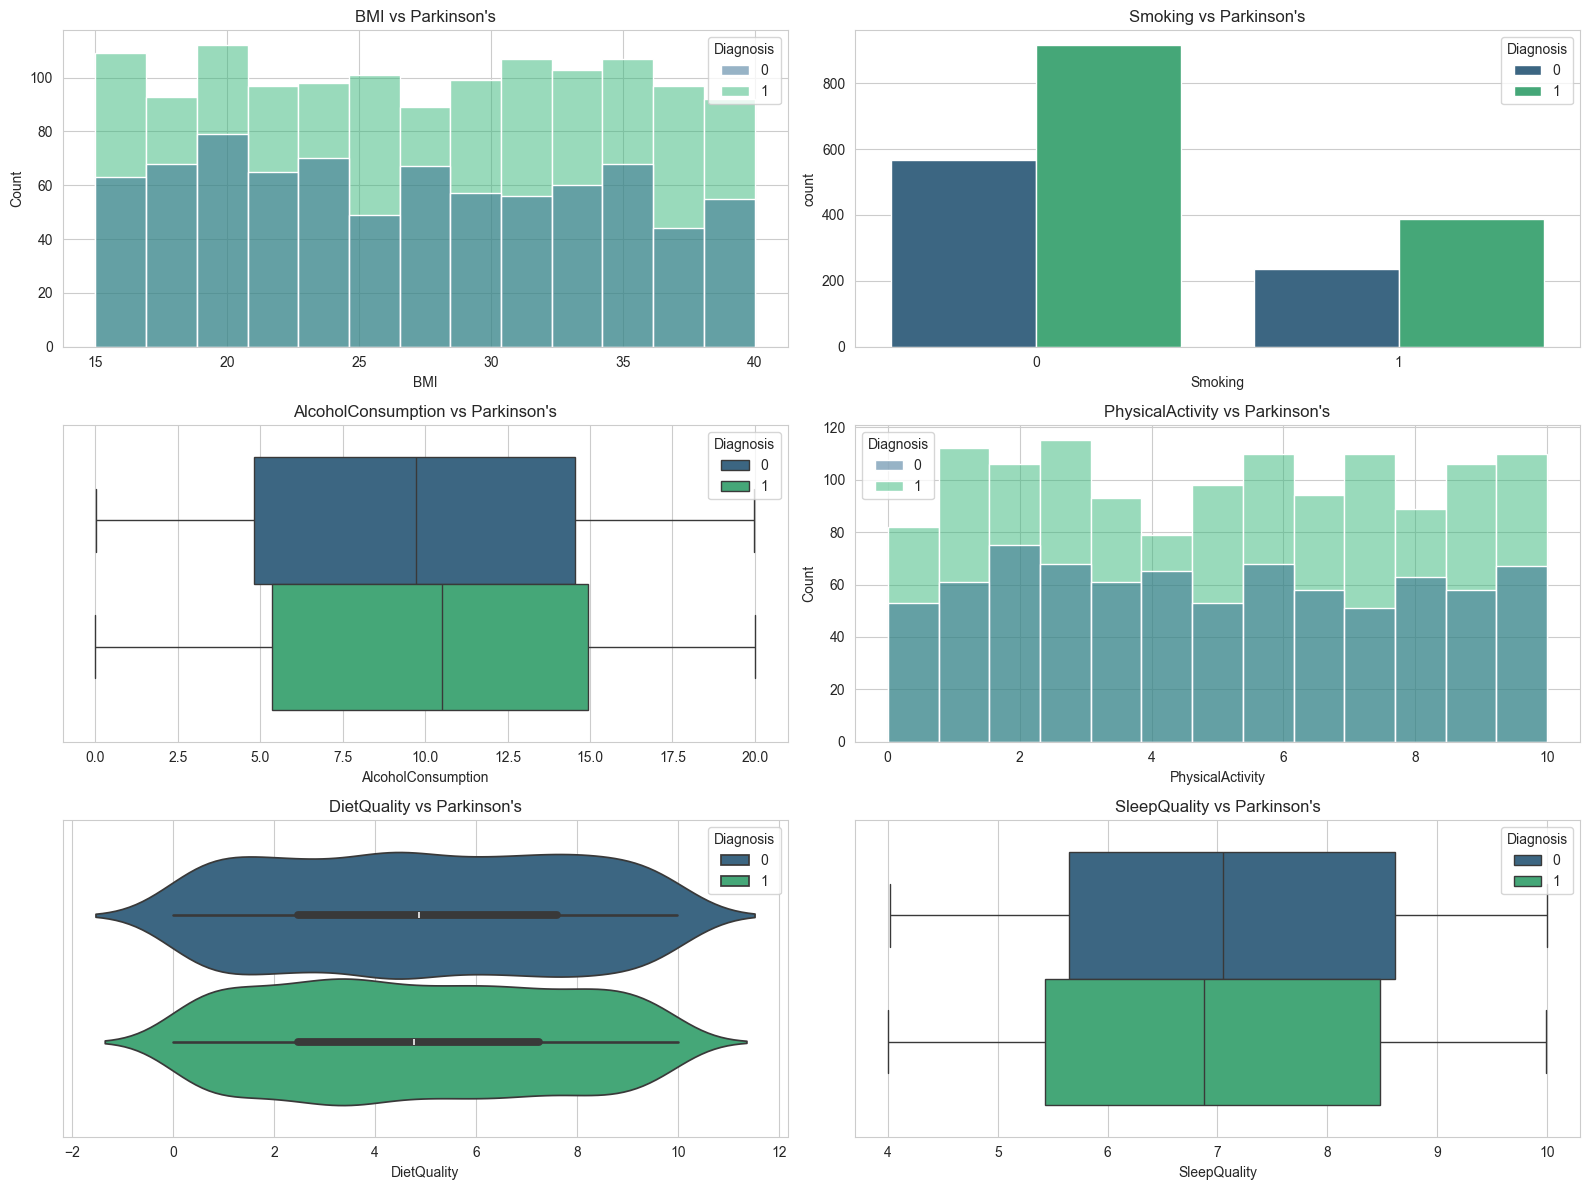

In [37]:
# Multiple feature visualization
fig, axes = plt.subplots(3,2, figsize = (16,12))

sns.histplot(x = 'BMI', hue = "Diagnosis", data = df, ax = axes[0,0], palette = 'viridis')
axes[0,0].set_title("BMI vs Parkinson's")

sns.countplot(x = 'Smoking', hue = "Diagnosis", data = df, ax = axes[0,1], palette = 'viridis')
axes[0,1].set_title("Smoking vs Parkinson's")

sns.boxplot(x = 'AlcoholConsumption', hue = "Diagnosis", data = df, ax = axes[1,0], palette = 'viridis')
axes[1,0].set_title("AlcoholConsumption vs Parkinson's")

sns.histplot(x = 'PhysicalActivity', hue = "Diagnosis", data = df, ax = axes[1,1], palette = 'viridis')
axes[1,1].set_title("PhysicalActivity vs Parkinson's")

sns.violinplot(x = 'DietQuality', hue = "Diagnosis", data = df, ax = axes[2,0], palette = 'viridis')
axes[2,0].set_title("DietQuality vs Parkinson's")

sns.boxplot(x = 'SleepQuality', hue = "Diagnosis", data = df, ax = axes[2,1], palette = 'viridis')
axes[2,1].set_title("SleepQuality vs Parkinson's")

plt.tight_layout()
plt.show()

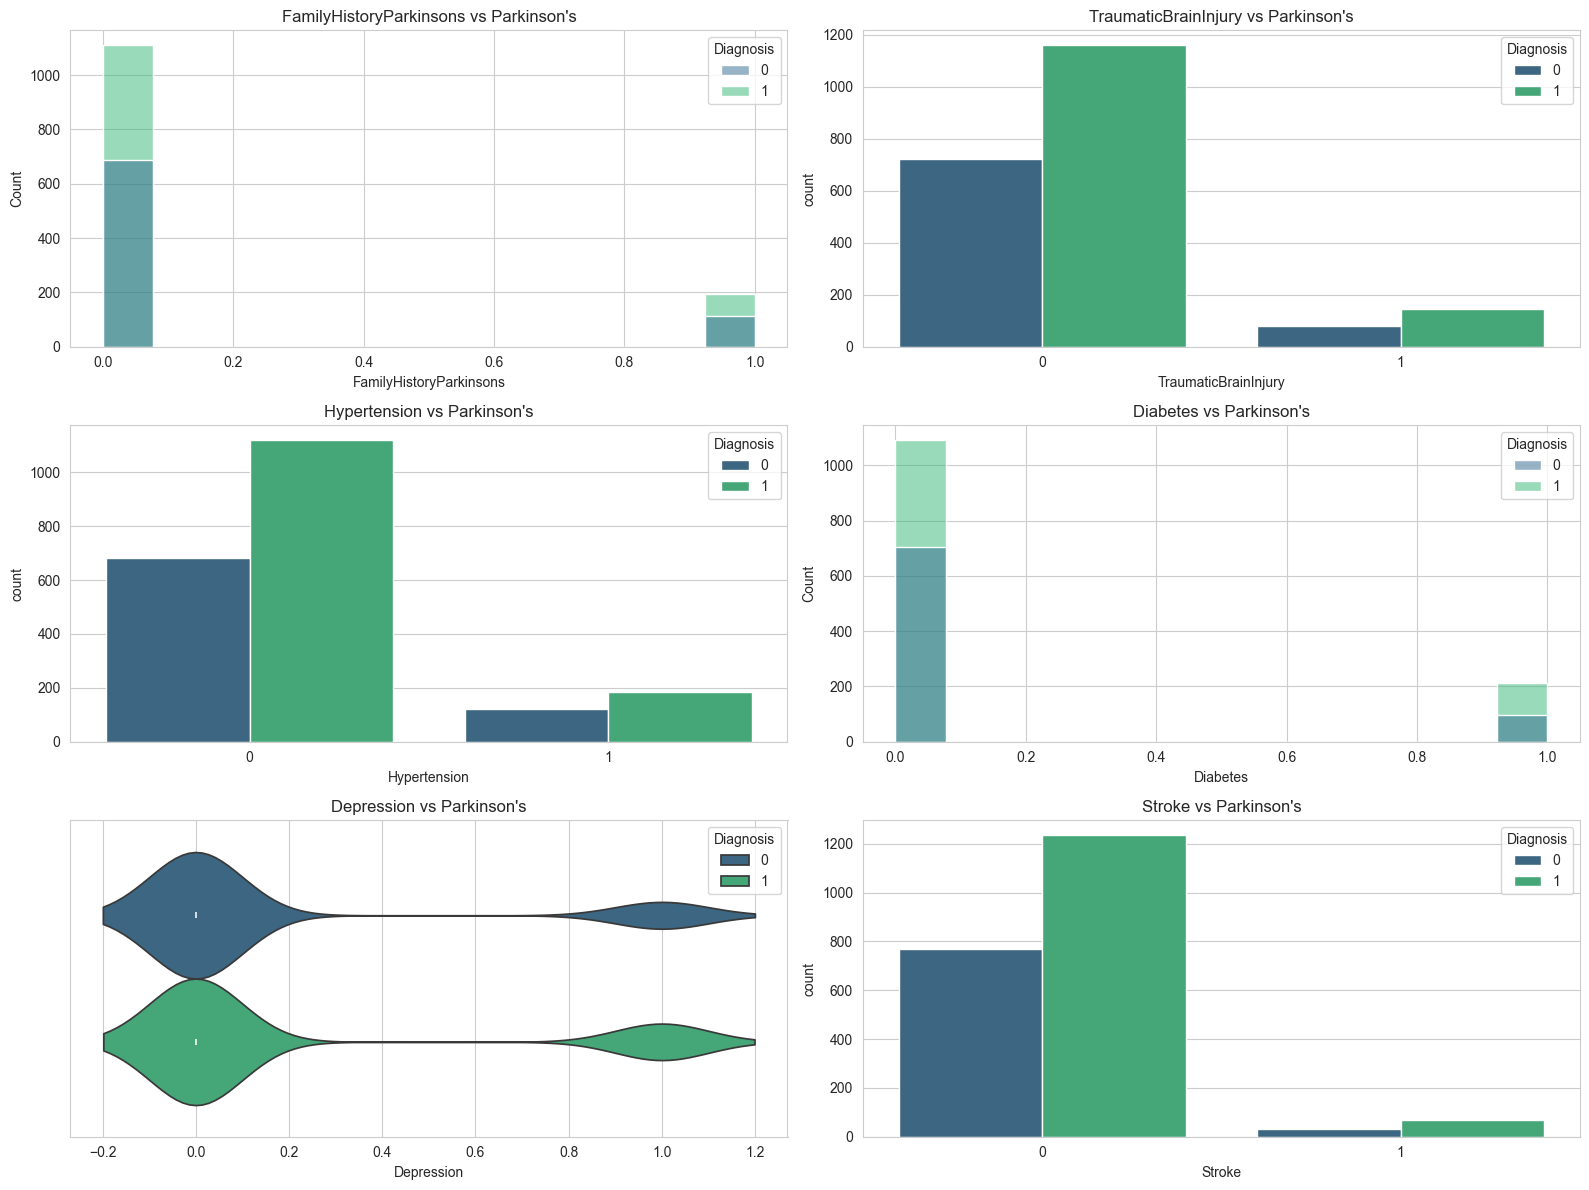

In [38]:
# Family history and comorbidities vs Parkinson's

fig, axes = plt.subplots(3,2, figsize = (16,12))

sns.histplot(x = 'FamilyHistoryParkinsons', hue = "Diagnosis", data = df, ax = axes[0,0], palette = 'viridis')
axes[0,0].set_title("FamilyHistoryParkinsons vs Parkinson's")

sns.countplot(x = 'TraumaticBrainInjury', hue = "Diagnosis", data = df, ax = axes[0,1], palette = 'viridis')
axes[0,1].set_title("TraumaticBrainInjury vs Parkinson's")

sns.countplot(x = 'Hypertension', hue = "Diagnosis", data = df, ax = axes[1,0], palette = 'viridis')
axes[1,0].set_title("Hypertension vs Parkinson's")

sns.histplot(x = 'Diabetes', hue = "Diagnosis", data = df, ax = axes[1,1], palette = 'viridis')
axes[1,1].set_title("Diabetes vs Parkinson's")

sns.violinplot(x = 'Depression', hue = "Diagnosis", data = df, ax = axes[2,0], palette = 'viridis')
axes[2,0].set_title("Depression vs Parkinson's")

sns.countplot(x = 'Stroke', hue = "Diagnosis", data = df, ax = axes[2,1], palette = 'viridis')
axes[2,1].set_title("Stroke vs Parkinson's")

plt.tight_layout()
plt.show()

In [39]:
# Standardize numeric features
numeric_cols = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 
                'SleepQuality','SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
                'UPDRS', 'MoCA', 'FunctionalAssessment']

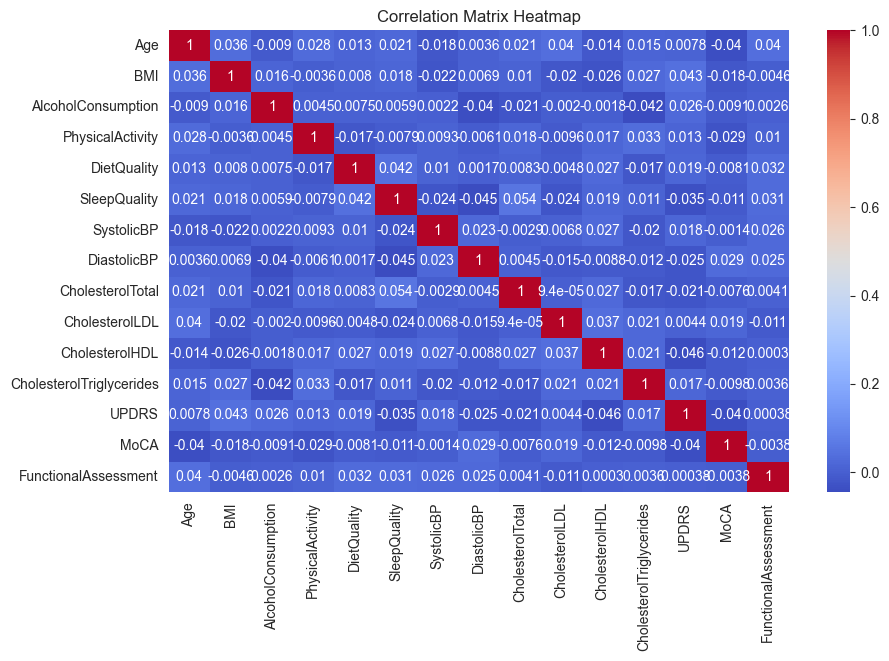

In [40]:
corr = df[numeric_cols].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Data Preprocessing

In [41]:
# Drop unnecessary columns

df = df.drop(columns=['PatientID', 'DoctorInCharge'])

In [42]:
# Split features and target

x = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

In [43]:
scaler = StandardScaler()
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])

--- Logistic Regression ---
Accuracy: 0.8005
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.78      0.79       421
weighted avg       0.80      0.80      0.80       421



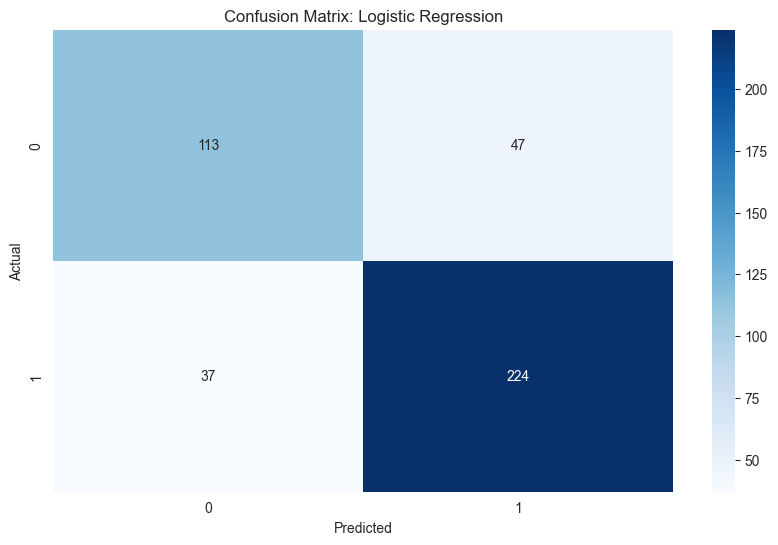

--- Random Forest ---
Accuracy: 0.9311
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       160
           1       0.94      0.95      0.94       261

    accuracy                           0.93       421
   macro avg       0.93      0.93      0.93       421
weighted avg       0.93      0.93      0.93       421



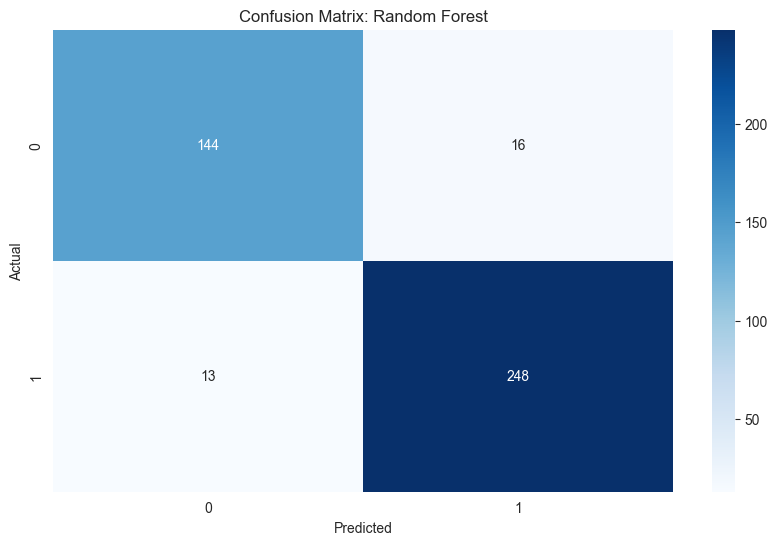

--- SVM ---
Accuracy: 0.8361
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       160
           1       0.84      0.90      0.87       261

    accuracy                           0.84       421
   macro avg       0.83      0.81      0.82       421
weighted avg       0.84      0.84      0.83       421



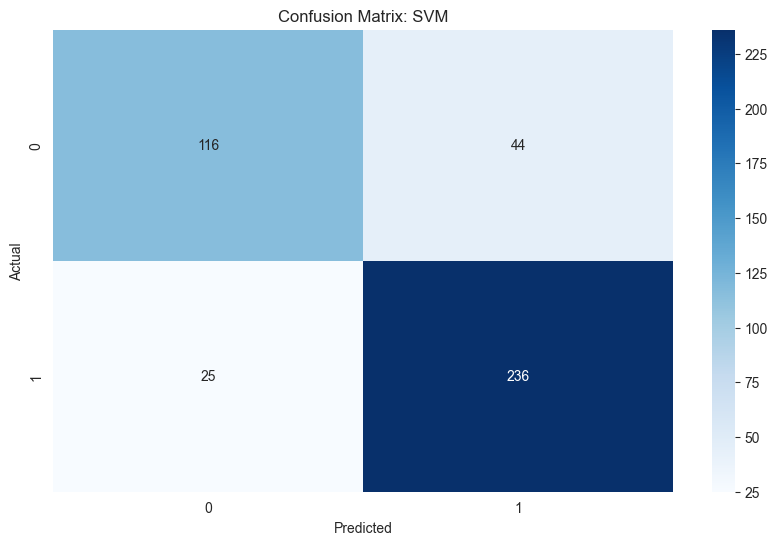

--- Gradient Boosting ---
Accuracy: 0.9406
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.95      0.96      0.95       261

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421



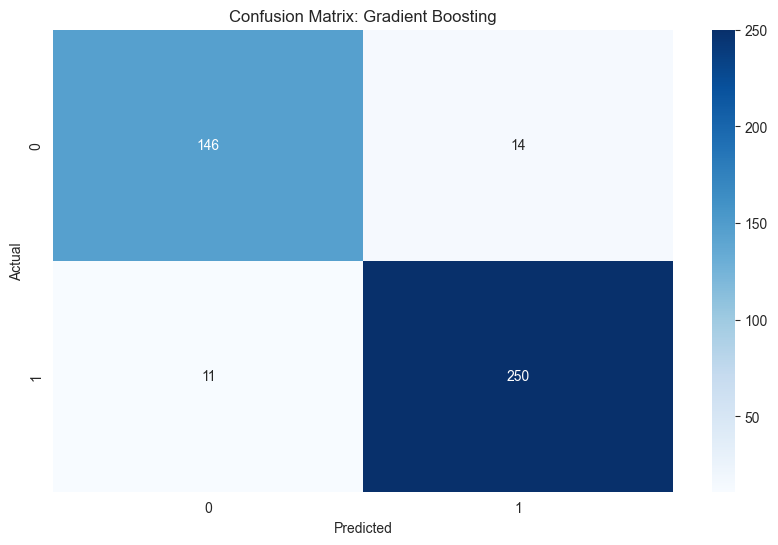

--- XGBoost ---
Accuracy: 0.9430
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       160
           1       0.96      0.95      0.95       261

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421



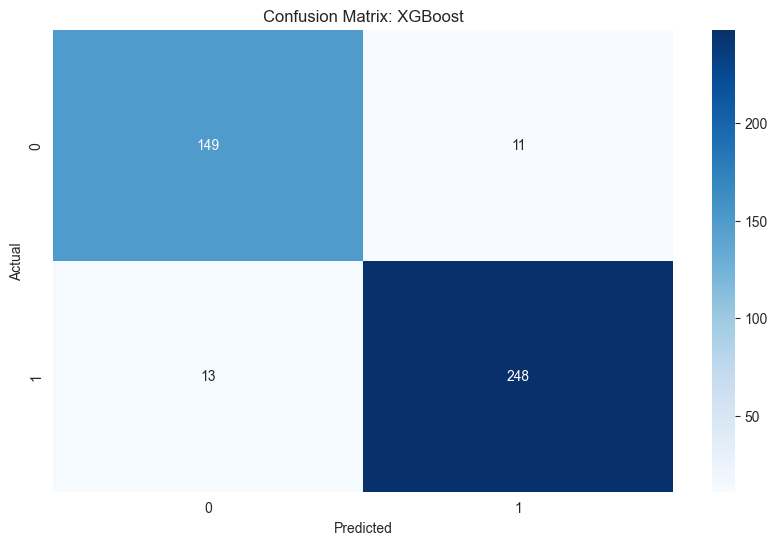

In [44]:
# Train-Test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# 5. Model Training & Evaluation

models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42),
    "SVM": SVC(probability = True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 100, random_state = 42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (10,6))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

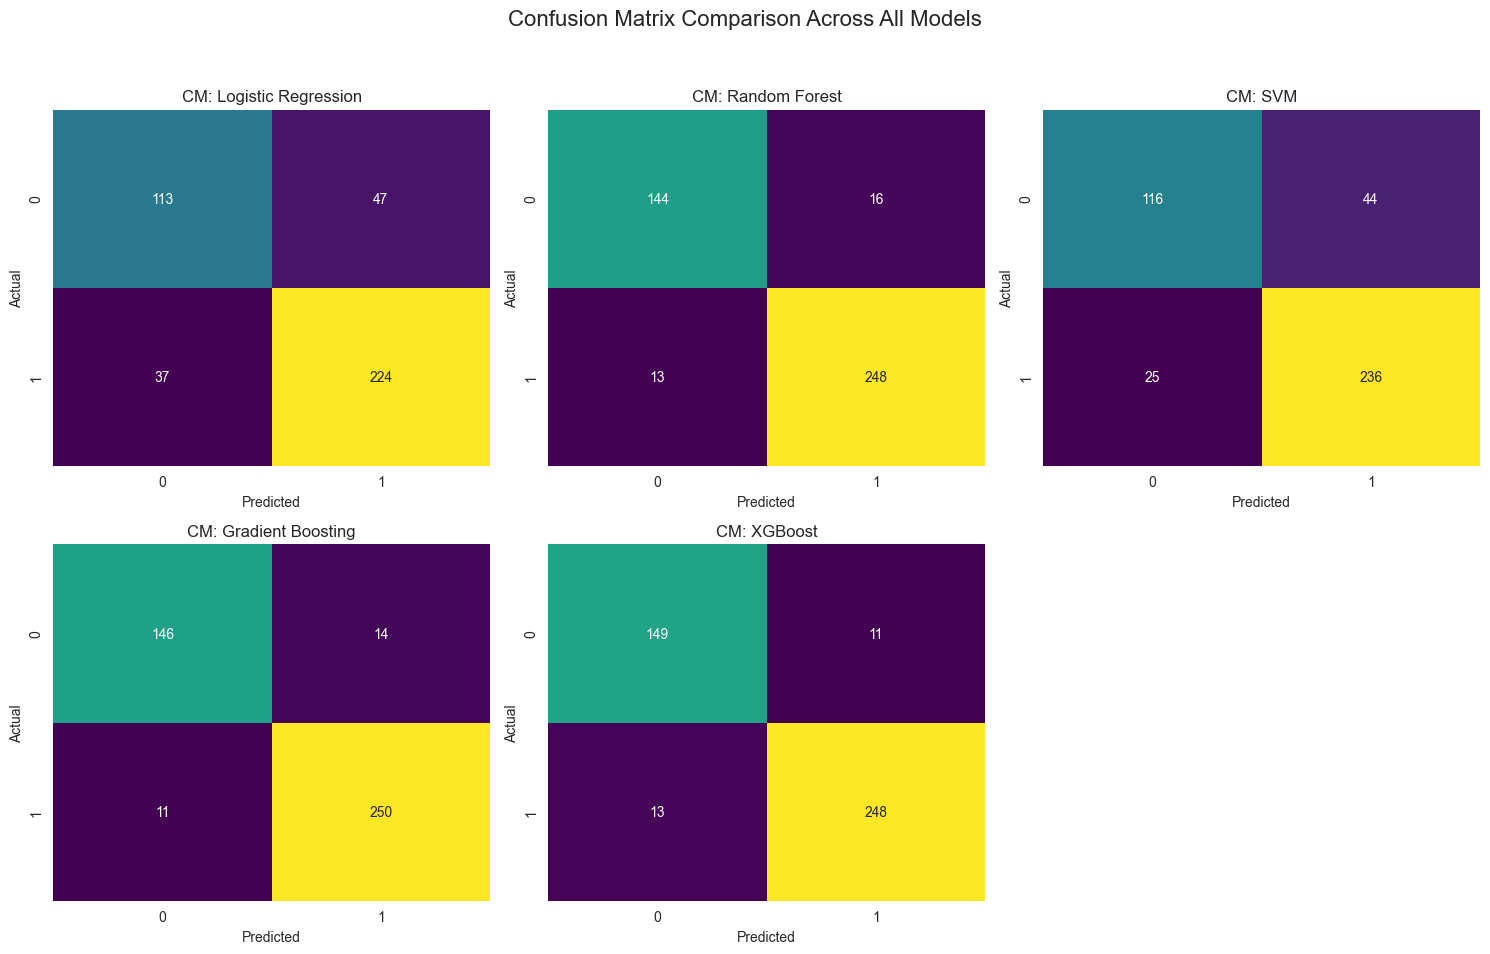


--- Model Performance Results DataFrame ---
                     Accuracy  Weighted Avg - F1-Score  Class 1 - Precision  \
Model                                                                         
XGBoost              0.942993                 0.943060             0.957529   
Gradient Boosting    0.940618                 0.940506             0.946970   
Random Forest        0.931116                 0.930987             0.939394   
SVM                  0.836105                 0.833810             0.842857   
Logistic Regression  0.800475                 0.799132             0.826568   

                     Class 1 - Recall  Class 1 - F1-Score  \
Model                                                       
XGBoost                      0.950192            0.953846   
Gradient Boosting            0.957854            0.952381   
Random Forest                0.950192            0.944762   
SVM                          0.904215            0.872458   
Logistic Regression          0.8582

In [45]:
n_models = len(models)
n_plots_row = 3
# Determine the number of rows needed (e.g., 2 rows for 5 models)
n_plots_col = int(np.ceil(n_models / n_plots_row))
n_total_axes = n_plots_row * n_plots_col

# Define the plot layout (e.g., 2x3 grid for 5 models)
fig, axes = plt.subplots(n_plots_col, n_plots_row, figsize=(15, 5 * n_plots_col))
axes = axes.flatten()

model_results = []
i = 0 

# Loop through models to plot CMs and collect data
for name, model in models.items():
    # Model Training/Prediction
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # --- Plotting Confusion Matrix on a Subplot ---
    ax = axes[i]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)
    
    # Set labels and title
    ax.set_title(f"CM: {name}", fontsize=12)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    # --- Collecting Model Results ---
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract metrics for the DataFrame
    results_dict = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        
        'Class 0 - Precision': report['0']['precision'],
        'Class 0 - Recall': report['0']['recall'],
        'Class 0 - F1-Score': report['0']['f1-score'],
        
        'Class 1 - Precision': report['1']['precision'],
        'Class 1 - Recall': report['1']['recall'],
        'Class 1 - F1-Score': report['1']['f1-score'],
        
        'Weighted Avg - F1-Score': report['weighted avg']['f1-score'],
        'Class 0 - Support': report['0']['support'],
        'Class 1 - Support': report['1']['support']
    }
    
    model_results.append(results_dict)
    i += 1 

# Final Plot Cleanup: Remove unused axes
for j in range(n_models, n_total_axes):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrix Comparison Across All Models", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('confusion_matrices_comparison.png')
plt.show()


# --- 2. Create and Output Results DataFrame ---
results_df = pd.DataFrame(model_results)

# Set Model as index, sort by Accuracy, and select/reorder columns
results_df = results_df.set_index('Model').sort_values(by='Accuracy', ascending=False)
results_df = results_df[['Accuracy', 'Weighted Avg - F1-Score',
                         'Class 1 - Precision', 'Class 1 - Recall', 'Class 1 - F1-Score', 
                         'Class 0 - Precision', 'Class 0 - Recall', 'Class 0 - F1-Score',
                         'Class 0 - Support', 'Class 1 - Support']]

print("\n--- Model Performance Results DataFrame ---")
print(results_df)

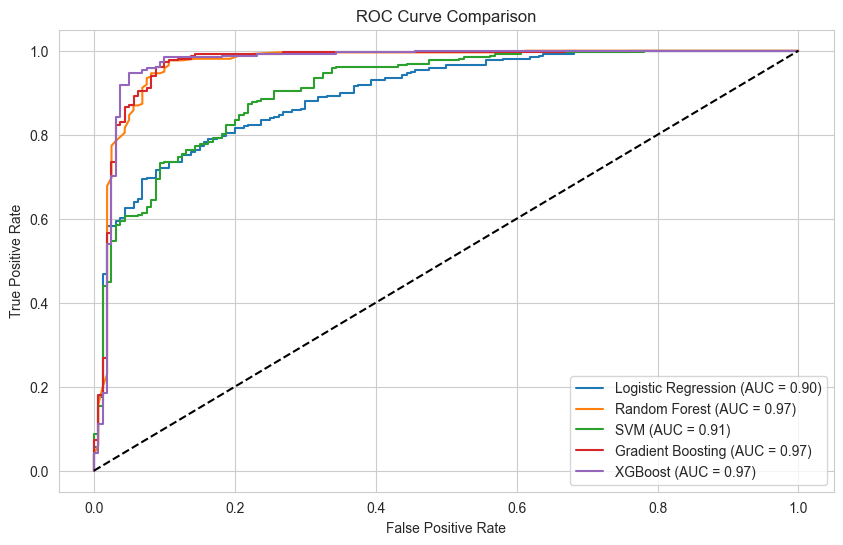

In [46]:
# ROC Curve Comparison

plt.figure(figsize = (10,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label = f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 6. Hyperparameter Tuning

In [47]:
# Randomized Search CV Hyperparameter Tuning

# -----------------------------
# Gradient Boosting Tuning
# -----------------------------
gb_model = GradientBoostingClassifier(random_state=42)

gb_param_dist = {
    'n_estimators': np.arange(100, 400, 50),
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

gb_random = RandomizedSearchCV(estimator=gb_model,
                               param_distributions=gb_param_dist,
                               n_iter=20,   # only 20 random combos
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1,
                               random_state=42,
                               verbose=2)

gb_random.fit(x_train, y_train)

print("Best Parameters for Gradient Boosting:", gb_random.best_params_)
print("Best AUC Score for Gradient Boosting:", gb_random.best_score_)

# -----------------------------
# XGBoost Tuning
# -----------------------------
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

xgb_param_dist = {
    'n_estimators': np.arange(100, 400, 50),
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_random = RandomizedSearchCV(estimator=xgb_model,
                                param_distributions=xgb_param_dist,
                                n_iter=20,   # only 20 random combos
                                cv=5,
                                scoring='roc_auc',
                                n_jobs=-1,
                                random_state=42,
                                verbose=2)

xgb_random.fit(x_train, y_train)

print("Best Parameters for XGBoost:", xgb_random.best_params_)
print("Best AUC Score for XGBoost:", xgb_random.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': np.int64(250), 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': np.float64(0.105)}
Best AUC Score for Gradient Boosting: 0.9652127801388865
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for XGBoost: {'subsample': 0.9, 'n_estimators': np.int64(250), 'max_depth': 3, 'learning_rate': np.float64(0.0575), 'gamma': 0.3, 'colsample_bytree': 0.9}
Best AUC Score for XGBoost: 0.9688498922187818


In [48]:
with open('parkinsons_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_random.best_estimator_, f)  # Or whatever is your final trained model

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 7. Model Comparison

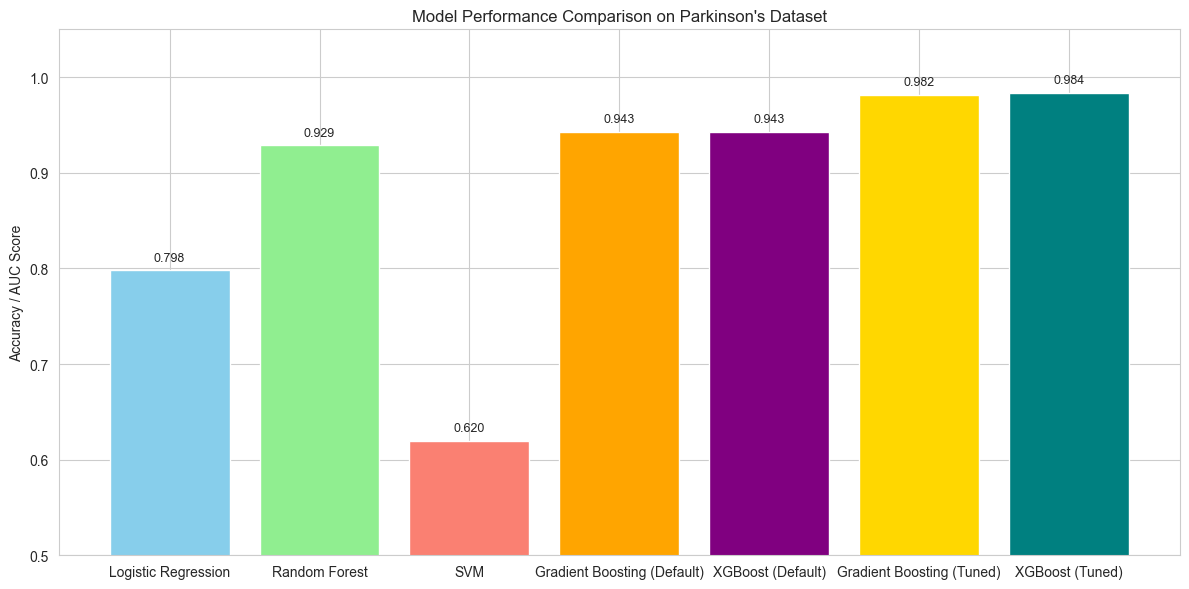

In [50]:
results = {
    "Logistic Regression": 0.7981,
    "Random Forest": 0.9287,
    "SVM": 0.6200,
    "Gradient Boosting (Default)": 0.9430,
    "XGBoost (Default)": 0.9430,
    "Gradient Boosting (Tuned)": 0.9817,  # Random Search best
    "XGBoost (Tuned)": 0.9836             # Random Search best
}

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(results.keys(), results.values(), color=["skyblue", "lightgreen", "salmon", "orange", "purple", "gold", "teal"])
plt.ylabel("Accuracy / AUC Score")
plt.title("Model Performance Comparison on Parkinson's Dataset")

# Annotate scores
for i, (model, score) in enumerate(results.items()):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', fontsize=9)

plt.ylim(0.5, 1.05)
plt.tight_layout()
plt.show()

# 8. Save Best Model (XGBoost Tuned)

In [51]:
best_model = xgb_random.best_estimator_
with open('parkinsons_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Best model saved as 'parkinsons_xgb_model.pkl'")

Best model saved as 'parkinsons_xgb_model.pkl'
